In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, brier_score_loss
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

## Read in data
This is the output from feature_selection notebook

In [2]:
euroscore_i = pd.read_csv("test.esi.features.17.02.20.csv", index_col=0)
euroscore_ii = pd.read_csv("test.esii.features.17.02.20.csv", index_col=0)

es_i_additive_supplied = pd.read_csv("Euroscore_additive.17.02.20.csv", index_col=0)
es_i_logistic_supplied = pd.read_csv("Euroscore_logistic.17.02.20.csv", index_col=0)

### Additive model

In [3]:
def calculate_euroscore_i_additive(row):
    result = 0
    
    if row['Age (continuous)'] > 60:
        result += (row['Age (continuous)'] - 60) / 5
    
    if row['Female']:
        result += 1
    
    if row['Pulmonary disease']:
        result += 1
    
    if row['Extracardiac arteriopathy']:
        result += 2
        
    if row['Neurological dysfunction']:
        result += 2
    
    if row['Previous cardiac surgery']:
        result += 3
    
    if row['Serum creatinine >200 µmol/l']:
        result += 2
        
    if row['Active endocarditis']:
        result += 3
    
    if row['Critical preoperative state']:
        result += 3
        
    return result

In [4]:
es_i_additive = []
for index, row in euroscore_i.iterrows():
    es_i_additive.append(calculate_euroscore_i_additive(row))
assert len(es_i_additive) == euroscore_i.shape[0]
es_i_additive = pd.DataFrame(es_i_additive, index=euroscore_i.index, columns=['es_i_additive'])
assert euroscore_i.shape[0] == es_i_additive.shape[0]

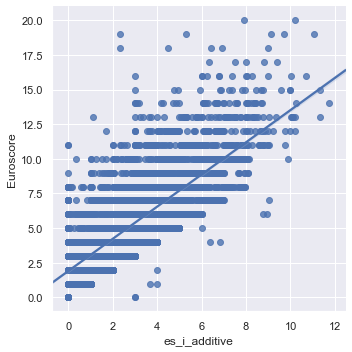

In [5]:
# plot calculated euroscore I additive against provided values
scores = pd.concat([es_i_additive_supplied['Euroscore'], es_i_additive], axis=1)
scores = scores.dropna(axis='index')
sns.lmplot(y="Euroscore", x="es_i_additive", data=scores)

In [6]:
# r2 for calculated euroscore I additive against provided values
r2_score(scores['Euroscore'], scores['es_i_additive'])

-0.017246149453614912

### ESI Logistic model

In [7]:
def calculate_euroscore_i_logistic(row):
    result = 0
    
    if row['Age (continuous)'] < 60:
        result += 0.0666354
    else:
        (row['Age (continuous)'] - 59) * 0.0666354
    
    if row['Female']:
        result += 0.3304052
    
    if row['Pulmonary disease']:
        result += 0.4931341
    
    if row['Extracardiac arteriopathy']:
        result += 0.6558917
        
    if row['Neurological dysfunction']:
        result += 0.841626
    
    if row['Previous cardiac surgery']:
        result += 1.002625
    
    if row['Serum creatinine >200 µmol/l']:
        result += 0.6521653
        
    if row['Active endocarditis']:
        result += 1.101265
    
    if row['Critical preoperative state']:
        result += 0.9058132
    
    if row['Recent myocardial infarct']:
        result += 0.5460218
    
    if row['LVEF 30–50%']:
        result += 0.4191643
    
    if row['LVEF <30%']:
        result +=  1.094443
        
    if row['Systolic pulmonary pressure >60 mmHg']:
        result += 0.7676924
        
    if row['Unstable angina']:
        result += 0.5677075
        
    if row['Emergency operation']:
        result += 0.7127953
        
    if row['Ventricular septal rupture']:
        result +=  1.462009
        
    if row['Other than isolated coronary surgery']:
        result += 0.5420364
        
    if row['Thoracic aortic surgery']:
        result += 1.159787
        
    # add the constant
    result += -4.789594
        
    return np.exp(result) / (1 + np.exp(result))

In [8]:
es_i_logistic = []
for index, row in euroscore_i.iterrows():
    es_i_logistic.append(calculate_euroscore_i_logistic(row))
assert len(es_i_logistic) == euroscore_i.shape[0]
es_i_logistic = pd.DataFrame(es_i_logistic, index=euroscore_i.index, columns=['es_i_logistic'])
assert euroscore_i.shape[0] == es_i_logistic.shape[0]

# write to csv
es_i_logistic.to_csv('test.esi.score.17.02.20.csv')

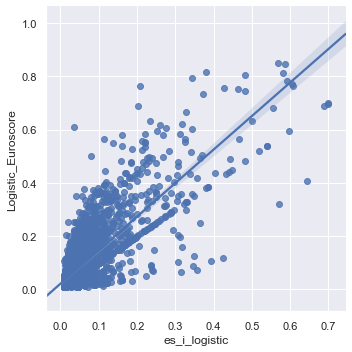

In [9]:
# plot calculated euroscore I logistic against provided values
scores = pd.concat([es_i_logistic_supplied['Logistic_Euroscore'], es_i_logistic], axis=1)
scores = scores.dropna(axis='index')
sns.lmplot(y="Logistic_Euroscore", x="es_i_logistic", data=scores)

In [10]:
# r2 for calculated euroscore I logistic against provided values
r2_score(scores['Logistic_Euroscore'], scores['es_i_logistic'])

0.4710103271226104

In [11]:
# roc curve for euroscore I logistic
fpr, tpr, thresholds = metrics.roc_curve(euroscore_i['STATUS_DISCHARGE'], es_i_logistic['es_i_logistic'], pos_label=1)
metrics.auc(fpr, tpr)

0.7595585704987122

### ESII Logistic model

In [12]:
def calculate_euroscore_ii_logistic(row):
    result = 0
    
    if row['NYHA - II']:
        result += 0.1070545
    
    if row['NYHA - III']:
        result += 0.2958358
    
    if row['NYHA - IV']:
        result += 0.5597929
    
    if row['CCS4']:
        result += 0.2226147
        
    if row['IDDM']:
        result += 0.3542749
    
    if row['IDDM']:
        result += 0.3542749
    
    if row['Age'] <= 60:
        result += 0.0285181
    else:
        (row['Age'] - 60) * 0.0285181
        
    if row['Female']:
        result += 0.2196434
    
    if row['ECA']:
        result += 0.5360268
        
    if row['CPD']:
        result += 0.1886564
    
    if row['N/M mob']:
        result += 0.2407181
    
    if row['Redo']:
        result += 01.118599
    
    if row['Renal dysfunction - On dialysis']:
        result +=  0.6421508
    
    if row['Renal dysfunction - CC <= 50']:
        result +=  0.8592256
        
    if row['Renal dysfunction - CC 50−85']:
        result +=  0.303553
        
    if row['AE']:
        result +=  0.6194522
        
    if row['Critical']:
        result +=  1.086517
    
    if row['LV function - Moderate']:
        result += 0.3150652
        
    if row['LV function - Poor']:
        result += 0.8084096
    
    #if row['LV function - Very poor']:
    #    result +=  0.9346919
    
    if row['Recent MI']:
        result +=  0.1528943
        
    if row['PA systolic pressure - 31–55 mmHg']:
        result +=  0.1788899
    
    if row['PA systolic pressure - >=55 mmHg']:
        result +=  0.3491475
    
    if row['Urgency - Urgent']:
        result +=  0.3174673
    
    if row['Urgency - Emergency']:
        result +=  0.7039121
    
    if row['Urgency - Salvage']:
        result +=   1.362947
    
    if row['Weight of procedure - 1 non-CABG']:
        result +=   0.0062118
    
    if row['Weight of procedure - 2']:
        result +=   0.5521478
        
    if row['Weight of procedure - 3+']:
        result +=   0.9724533
        
    if row['Thoracic aorta']:
        result +=  0.6527205
    
    # add the constant
    result += -5.324537
        
    return np.exp(result) / (1 + np.exp(result))

In [13]:
es_ii_logistic = []
for index, row in euroscore_ii.iterrows():
    es_ii_logistic.append(calculate_euroscore_ii_logistic(row))
assert len(es_ii_logistic) == euroscore_ii.shape[0]
es_ii_logistic = pd.DataFrame(es_ii_logistic, index=euroscore_ii.index, columns=['es_ii_logistic'])

# write to csv
es_ii_logistic.to_csv('test.esii.score.17.02.20.csv')

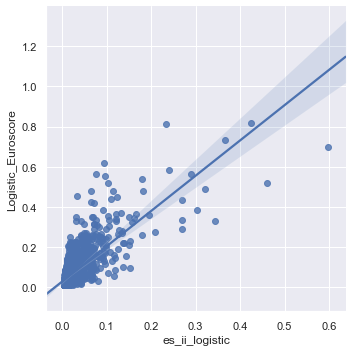

In [14]:
# plot calculated euroscore II logistic against provided euroscore I logistic to check for extreme error
scores = pd.concat([es_i_logistic_supplied['Logistic_Euroscore'], es_ii_logistic], axis=1)
scores = scores.dropna(axis='index')
sns.lmplot(y="Logistic_Euroscore", x="es_ii_logistic", data=scores)

In [15]:
# r2 for calculated euroscore II logistic against provided euroscore I logistic to check for extreme error
r2_score(scores['Logistic_Euroscore'], scores['es_ii_logistic'])

0.18201866668615652

In [16]:
# roc curve for euroscore II logistic
fpr, tpr, thresholds = metrics.roc_curve(euroscore_ii['STATUS_DISCHARGE'], es_ii_logistic['es_ii_logistic'], pos_label=1)
metrics.auc(fpr, tpr)

0.7704637641968631